<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="https://qworld.net" target="_blank"><img src="../images/qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Berat Yenilen, Utku Birkan, Arda Çınar, Cenk Tüysüz and Özlem Salehi (<a href="https://qworld.net/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<h1> Bernstein-Vazirani Algorithm </h1>

Developed in 1992 by Ethan Bernstein and Umesh Vazirani, the BV algorithm
solves a problem known as the hidden shift problem, which has important applications in cryptography and error-correcting codes. In the hidden shift problem, we
are given a function f(x) that is guaranteed to have some hidden shift a, meaning
that some unknown bit string a exists such that $f(x) = f(a ⊕ x)$ for all inputs x.
The goal of the hidden shift problem is to find the hidden shift a.
The BV algorithm uses the phase kickback technique (discussed in the next section)
to determine the n-bit hidden shift (or the hidden string) on a quantum computer
using a black box function. In other words, given a function f(x) that takes an
n-bit string x as input and returns a single bit, the algorithm aims to find the
unknown n-bit string a that defines the function as

$$f(x) = a \cdot x (mod2)$$

The intuition behind the Bernstein-Vazirani algorithm is to exploit the superposition and entanglement properties of quantum mechanics to efficiently determine
the unknown string. The algorithm uses a quantum oracle that applies the function f(x) to a superposition of all possible inputs in parallel, and the resulting
quantum state carries information about a. By measuring the quantum state, the
algorithm can extract the bits of a one by one with high probability.

Let $x \cdot s$ represent the inner product of the bit strings modulo 2. 

For instance if $x = 1000$ and $s = 1010$, then $x\cdot s = 1.1 + 0.0 + 0.1 + 0.0 = 1 \pmod 2 = 1$

## Problem

Given an oracle function $f:\{0,1\}^n \rightarrow \{0,1\}$, which is defined as $ f(\mathbf{x}) = x \cdot s $, find the secret string (sequence of bits) $s$.


This might come across as a bit of an artificially created problem, because it is. It was specifically designed to be solved using a quantum computer in order to show there can be advantages in using quantum algorithms over probabilistic algorithms.

Let's start by giving an example of such an $f$.

\begin{align*}
	f(00)&=0\\
	f(01)&=1\\
	f(10)&=0\\
	f(11)&=1\\
	\end{align*}
    
In this example, $s$ is $01$, as $f(00)=00\cdot 01=0$, $f(01)=01\cdot 01 = 1$, $f(10)=10\cdot01=0$ and $f(11)=11\cdot01=1$.
    
  

Note that now the unitary operator $U_f$ takes the following form: $ U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus ( x \cdot s)} $. 



### Task 1

- Using how many queries can you solve the problem clasically? How many queries if you use a probabilistic algorithm?
- How many queries do you think we need to make if we are to solve the problem with a quantum computer? 

<h3>Solution</h3>

Let's illustrate the solution over an example.

Let $n$ = 4 and let's make the following queries to function $f$.

\begin{align*}
f(1000) &= s_1.1 + s_2.0 + s_3.0 + s_4.0 = s_1\\
f(0100) &= s_1.0 + s_2.1 + s_3.0 + s_4.0 = s_2\\
f(0010) &= s_1.0 + s_2.0 + s_3.1 + s_4.0 = s_3\\
f(0001) &= s_1.0 + s_2.0 + s_3.0 + s_4.1 = s_4\\
\end{align*}

We need $n$ queries and this is an optimal way of solving this problem by classical and probabilistic
algorithms. For further information about why classical and probabilistic algorithms can not perform better, please refer
to Information Theory.

### Task 2

What can we say about the $f:\{0,1\}^n \rightarrow \{0,1\}$ function if $s = 0^n$?

<h3>Solution</h3>

If $s=0^n$, then $f(x)=0$ for all $x$.

## Algorithm

We use exactly the same algorithm as Deutsch-Jozsa.

 <img src="../images/deutschjozsa.png" width="60%" align="center">

We construct a circuit with $n+1$ qubits. 

- Set the $n+1$'st qubit to state $\ket{-}$ by applying $X$ and $H$ gates.
- Apply $H$ to first $n$ qubits.
- Apply $U_f$.
- Apply $H$ to first $n$ qubits.
- Measure the first $n$ qubits to obtain $s$.

## Analysis

 <img src="../images/deutschjozsa2.png" width="60%" align="center">
 
As we have the same circuit as Deustch-Jozsa, the initialization is the same,

$$ \ket{\psi_2} = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n} \ket{x} \otimes \ket{-}.$$

From now on we can ignore the output qubit and focus on our input qubits. After applying $U_f$ we then get the state

$$ \ket{\psi_{3,0}}= \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{f(x)} \ket{x}.$$

Let's replace $f(x) = x \cdot s$, and rewrite our state as

$$ \ket{\psi_{3,0}} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{x \cdot s} \ket{x}.$$

From the previous notebook we know that 
$$ H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{x \cdot z} \ket{z}. $$

We also know that the $H^{\otimes n}$ operator is its own inverse. Thus, we can say that $H^{\otimes n}\ket{a} = \ket{b} \Longleftrightarrow H^{\otimes n}\ket{b} = \ket{a}$. So in fact, $\ket{\psi_3}$ is the state obtained after applying $H^{\otimes n}$ to $\ket{s}$.

Hence after applying $H^{\otimes n}$ to the input qubits, we get the final state as 

$$\ket{\psi_{4,0}} = \ket{s}.$$ 

We measure the first $n$ qubits and we observe the string $s$ with probability 1.

Note that this is also an exact algorithm without any errors like the other algorithms we have seen so far.

### Task 3

Given an oracle function `bv_oracle()` that constructs a 6 qubit oracle circuit ($s$ has length 5) for $f$, construct a circuit that implements the algorithm described above to find out $s$.

Note that qubit 5 is the output qubit.

Run the following cell to load function `bv_oracle()`.

In [1]:
%run ../include/oracle.py

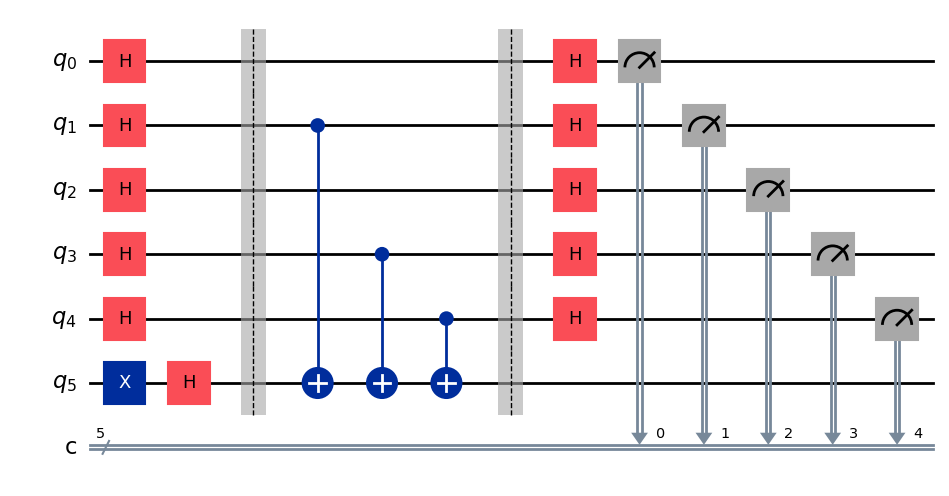

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

n=5  

#Create quantum circuit
bv_circuit = QuantumCircuit(n+1, n)

#Apply X gate to last qubit
bv_circuit.x(n)

#Apply Hadamard to all qubits
bv_circuit.h(range(n+1))

#Apply oracle
bv_circuit.compose(bv_oracle(), inplace=True)

#Apply Hadamard to all qubits
bv_circuit.h(range(n))

#Measure the first 4 qubits
bv_circuit.measure(range(n), range(n))

#Draw the circuit
bv_circuit.draw(output="mpl")

In [8]:
job = AerSimulator().run(bv_circuit,shots=10000)
counts = job.result().get_counts()
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

01011 is observed 10000 times


### Task 4

Given $\textbf{s} = 0110$, implement a function that returns an oracle for the function  $ f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{s} $. Note that $n=4$ and you will need a cirucit with 5 qubits where qubit 4 is the output qubit.

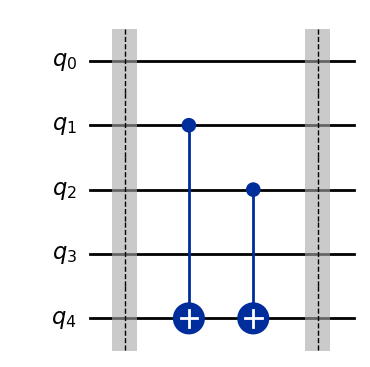

In [7]:
from qiskit import QuantumCircuit

def oracle():
    circuit = QuantumCircuit(5)
    circuit.barrier()
    
    circuit.cx(1, 4)
    circuit.cx(2, 4)
    
    circuit.barrier()
    return circuit

oracle().draw(output="mpl")

Recall from Task 1 that we need at least $n$ queries both using the deterministic and probabilistic approaches. Now finally, we have an algorithm which provides speedup in the query model also against probabilistic algorithms, although not exponential.